In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [2]:
n = 12
G = nx.Graph()
G.add_nodes_from(np.arange(0,n,1))
elist = [(0,1,356.0),(0,6,416.0),(1,2,636.0),(1,7,416.0),(2,3,356.0),(2,8,416.0),(3,4,636.0),(3,9,416.0),(4,5,356.0),(4,10,416.0),(5,0,636.0),(5,11,416.0)]
G.add_weighted_edges_from(elist)
colors = ["b" for node in G.nodes()]
pos = nx.spring_layout(G)

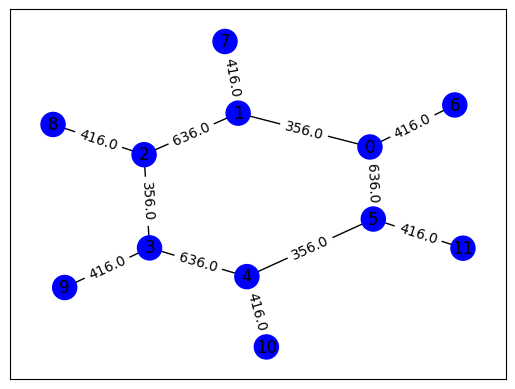

In [3]:
def f(G,colors,pos):
    nx.draw_networkx(G,node_color = colors,pos=pos)
    edge_labels=nx.get_edge_attributes(G,"weight")
    nx.draw_networkx_edge_labels(G,pos=pos,edge_labels=edge_labels)
f(G,colors,pos)

In [4]:
w = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i,j,default=0)
        if temp != 0:
            w[i][j] = temp["weight"]
print(w)

[[  0. 356.   0.   0.   0. 636. 416.   0.   0.   0.   0.   0.]
 [356.   0. 636.   0.   0.   0.   0. 416.   0.   0.   0.   0.]
 [  0. 636.   0. 356.   0.   0.   0.   0. 416.   0.   0.   0.]
 [  0.   0. 356.   0. 636.   0.   0.   0.   0. 416.   0.   0.]
 [  0.   0.   0. 636.   0. 356.   0.   0.   0.   0. 416.   0.]
 [636.   0.   0.   0. 356.   0.   0.   0.   0.   0.   0. 416.]
 [416.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 416.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 416.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 416.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 416.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 416.   0.   0.   0.   0.   0.   0.]]


case = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 0.0
case = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 1408.0
case = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 1408.0
case = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 2104.0
case = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 1408.0
case = [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 2816.0
case = [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 1544.0
case = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 2240.0
case = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0] cost = 1408.0
case = [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0] cost = 2816.0
case = [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0] cost = 2816.0
case = [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0] cost = 3512.0
case = [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0] cost = 2104.0
case = [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0] cost = 3512.0
case = [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0] cost = 2240.0
case = [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0] cost = 2936.0
case = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0] cost = 1408.0
case = [1, 0, 0, 

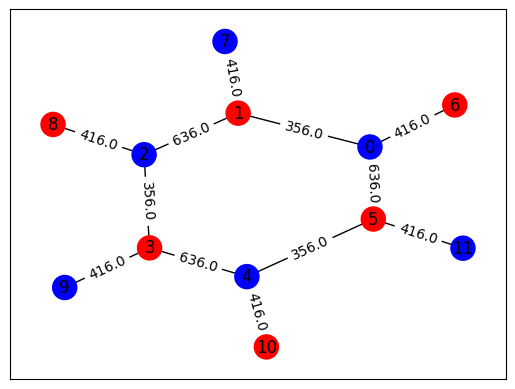

In [5]:
sol = 0
for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]
    cost = 0
    for i in range(n):
        for j in range(n):
            cost += w[i][j]*x[i]*(1-x[j])
    if sol < cost:
        sol = cost
        xlist = x
    print("case = " +str(x)+ " cost = " +str(cost))
colors = ["b" if xlist[i] == 0 else "r" for i in range(n)]
f(G,colors,pos)
print(" best solution = " +str(xlist)+ " cost = " +str(sol))